# time_series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# getting the data 
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [3]:
# assining the data to df
df = data.sf_temps()

In [4]:
# setting the index of the data to 'date' and then sorting
df = df.set_index('date').sort_index()

In [5]:
df.head() # check_yo_head

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
# resample the data by day 'D' and taking the mean
df1 = df.resample('D').mean()

In [7]:
df1.head() # check_yo_head

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

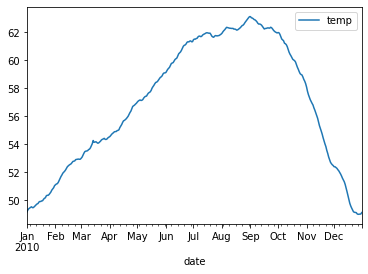

In [8]:
# visualizing the average over time with .plot()
df1.plot()

2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
# resample 'D' for .min()
df2 = df.resample('D').min()

In [10]:
df2.head() # check_yo_head

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

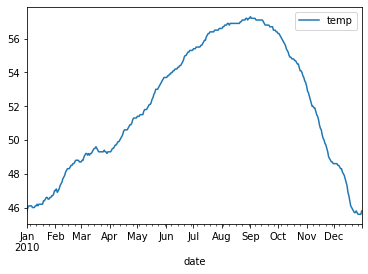

In [11]:
# visualizing the min over time with .plot()
df2.plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [12]:
# resample 'D' for .max()
df3 = df.resample('D').max()

In [13]:
df3.head() # check_yo_head

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

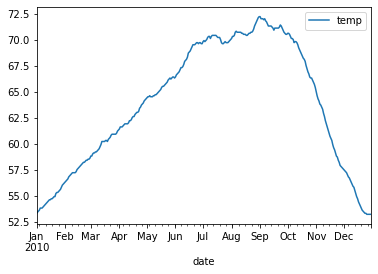

In [14]:
# visualizing the min over time with .plot()
df3.plot()

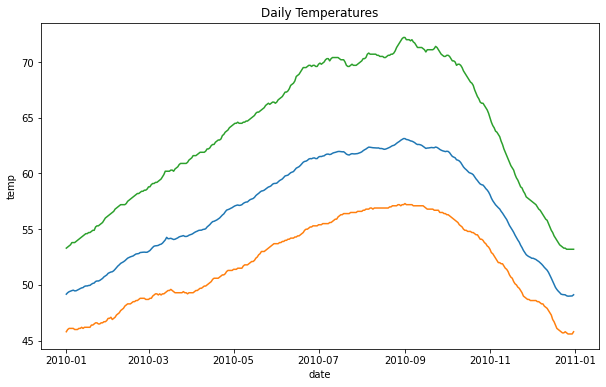

In [15]:
# putting all three graphs together on one graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df1 , x=df1.index, y='temp')
sns.lineplot(data=df2 , x=df2.index, y='temp')
sns.lineplot(data=df3 , x=df3.index, y='temp')
plt.title('Daily Temperatures')

plt.show()

4. Which month is the coldest, on average?

In [16]:
df4 = df.resample('M').mean().index.max()

In [17]:
df4

Timestamp('2010-12-31 00:00:00', freq='M')

In [18]:
# getting the coldest month
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('M').mean()

In [19]:
# January is the coldest month with an average of 49.98 degrees
dfmin.loc[dfmin['temp'] == dfmin.temp.min()]

,temp
date,
2010-01-31,49.98414


In [20]:
df.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

In [21]:
df.resample('M').mean().sort_values(by='temp').head()

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139


5. Which month has the highest average temperature?

In [22]:
# getting the hottest month
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfminmax = df.temp.resample('D').agg(['min','max'])

In [23]:
# feeling 'hot', 'hot', 'hot'
dfminmax['dif'] = dfminmax['max'] - dfminmax['min']
dfminmax = dfminmax.resample('M').mean()
dfminmax.loc[dfminmax['dif'] == dfminmax.dif.max()]

,min,max,dif
date,,,
2010-09-30,56.903333,71.306667,14.403333


In [24]:
# another way of doing things for hottest month
print('The hottest month is:\n', 
      df.resample('M').mean().idxmax()[0], 
      'with an average of', 
      df.resample('M').mean().max().round(2)[0])

The hottest month is:
 2010-09-30 00:00:00 with an average of 62.49


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [25]:
# taking the resample to calulate the min and max temps
df_min_max = df.resample('D').agg(['min','max'])

In [26]:
df_min_max.head() # check_yo_head

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [27]:
# creating a new column for the 'change' in temps
df_min_max['change'] = df_min_max[('temp', 'max')] - df_min_max[('temp', 'min')]

In [28]:
df_min_max.head() # check_yo_head

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [29]:
df_min_max.change.resample('M').mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change, dtype: float64

In [30]:
# getting the month with the max change
df_min_max.change.resample('M').mean().idxmax().month_name()

'September'

In [31]:
# getting the change value
df_min_max.change.resample('M').mean().max()

14.40333333333333

In [32]:
# Which month has the highest daily temperature variability?
# September '2010-09-30'
# 14.40

# Seattle Weather Sucks

In [33]:
# importing new dataset
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [34]:
# getting data, setting index to 'date' and assigning it to df
df = data.seattle_weather().set_index('date')

In [35]:
df.head() # check_yo_head

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [36]:
df.precipitation.resample('M').sum().idxmax().month_name()

'December'

In [37]:
df.precipitation.resample('M').sum().max()

284.5000000000001

## Which year and month combination has the highest amount of precipitation?
- December with 284.50 rains

Text(0.5, 1.0, 'Amount of Precipitation by Months')

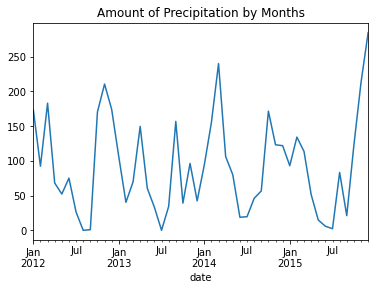

In [38]:
# Visualize the amount of monthly precipitation over time.
df.precipitation.resample('M').sum().plot()
plt.title('Amount of Precipitation by Months')

<AxesSubplot:xlabel='date'>

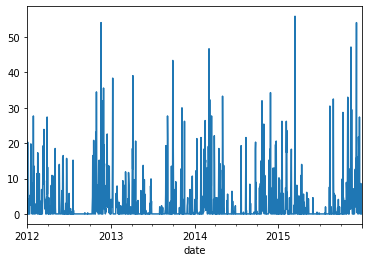

In [39]:
# just messing around with .plot now
df.precipitation.plot()

Text(0.5, 1.0, 'The Winds of Time')

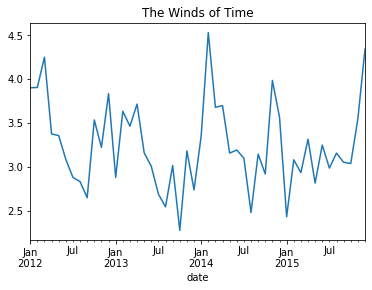

In [40]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.
df.wind.resample('M').mean().plot()
plt.title('The Winds of Time')

<AxesSubplot:xlabel='date'>

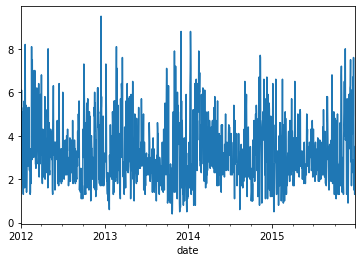

In [41]:
# dropping a .plot() on all the winds
df.wind.plot()

In [42]:
# Which year-month combination is the windiest?
df.wind.resample('M').mean().idxmax().month_name()

'February'

In [43]:
# getting the windiest year
df.wind.resample('M').mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [44]:
# getting the average amount of breaking winds
df.wind.resample('M').mean().max()

4.5285714285714285

## Which year-month combination is the windiest?
- February '2014-02-28'with Average winds 4.53

In [45]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
df[df.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [46]:
# getting the year with the most 'sun' days
df[df.weather == 'sun'].resample('Y').count().weather.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In [47]:
# getting the count of 'sun' days
df[df.weather == 'sun'].resample('Y').count().weather.max()

211

## What's the sunniest year? 
- 2014 with 211 days of sun

In [48]:
# In which month does it rain the most?
df.precipitation.resample('M').mean().idxmax().month_name()

'December'

In [49]:
# getting the average amount of rainfall
df.precipitation.resample('M').mean().max()

9.177419354838714

## In which month does it rain the most?

- December with an average of 9.17 winds

In [50]:
# Which month has the most number of days with a non-zero amount of precipitation?
df[df.precipitation > 0].weather.resample('M').count().idxmax().month_name()

'December'

In [51]:
# getting the num
df[df.precipitation > 0].weather.resample('M').count().max()

27

## Which month has the most number of days with a non-zero amount of precipitation?
- December with 27 non-zero rains

# Top Flight Data

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?


In [52]:
# getting the Top Flight Data and assigning it to df
df = data.flights_20k()

In [53]:
df.head() # check_yo_head

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [54]:
# adding a 'weekday' column to the data
df['weekday'] = df.date.dt.day_name()

In [55]:
# adding a'month' column to the data
df['month'] = df.date.dt.month_name()

In [56]:
# setting index of the data to 'date'
df = df.set_index('date')

In [57]:
df.head() # check_yo_head

,delay,distance,origin,destination,weekday,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday,January
2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday,February
2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday,January
2001-03-30 21:45:00,-2,229,STL,IND,Friday,March


In [58]:
# Convert any negative delays to 0.
df.delay = df.delay.where((df.delay > 0), 0)

In [59]:
df.head() # check_yo_head

,delay,distance,origin,destination,weekday,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,Friday,March


In [60]:
# Which hour of the day has the highest average delay?
df.delay.resample('H').mean().idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

In [61]:
# df.index.day_name()

In [62]:
day = df.groupby('weekday')

In [63]:
day.delay.mean().idxmax()

'Friday'

In [64]:
# Does the day of the week make a difference in the delay amount?
day.delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [65]:
# Does the month make a difference in the delay amount?
month = df.groupby('month')

In [66]:
month.delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

In [67]:
month.delay.mean().idxmax()

'February'

# Bonus
- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

In [69]:
# getting the bonus question data
from vega_datasets import data
df = data.iowa_electricity()

In [70]:
df.head() # check_yo_head

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [71]:
df.tail()

,year,source,net_generation
46,2013-01-01,Renewables,16476
47,2014-01-01,Renewables,17452
48,2015-01-01,Renewables,19091
49,2016-01-01,Renewables,21241
50,2017-01-01,Renewables,21933


In [73]:
df = df.pivot(index='year', columns='source')

In [74]:
df.head()

net_generation                          
source       Fossil Fuels Nuclear Energy Renewables
year                                               
2001-01-01          35361           3853       1437
2002-01-01          35991           4574       1963
2003-01-01          36234           3988       1885
2004-01-01          36205           4929       2102
2005-01-01          36883           4538       2724

In [75]:
df.columns=['fossils','nuclear','renewables']

In [76]:
df.head()

,fossils,nuclear,renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


In [77]:
df['energy_total'] = df.fossils + df.nuclear + df.renewables

In [78]:
df.head()

,fossils,nuclear,renewables,energy_total
year,,,,
2001-01-01,35361,3853,1437,40651
2002-01-01,35991,4574,1963,42528
2003-01-01,36234,3988,1885,42107
2004-01-01,36205,4929,2102,43236
2005-01-01,36883,4538,2724,44145


In [79]:
df['fossil_percentage'] = (df.fossils / df.energy_total) *100
df['nuclear_percentage'] = (df.nuclear / df.energy_total) *100
df['renewables_percentage'] = (df.renewables / df.energy_total) *100

In [80]:
df.head()

,fossils,nuclear,renewables,energy_total,fossil_percentage,nuclear_percentage,renewables_percentage
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574


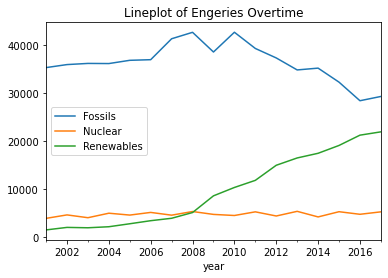

In [82]:
df.fossils.plot(label='Fossils')
df.nuclear.plot(label='Nuclear')
df.renewables.plot(label='Renewables')
plt.title('Lineplot of Engeries Overtime')
plt.legend()

In [83]:
df.pivot_table(columns='year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
energy_total,40651.000000,42528.000000,42107.000000,43236.000000,44145.000000,45473.000000,49778.000000,53086.000000,51859.000000,57509.000000,56371.000000,56675.000000,56670.000000,56854.000000,56653.000000,54381.000000,56476.000000
fossil_percentage,86.986790,84.628950,86.052200,83.738089,83.549666,81.397753,83.147173,80.499567,74.471162,74.336191,69.824910,65.953242,61.536968,62.000915,57.047288,52.292161,51.931794
fossils,35361.000000,35991.000000,36234.000000,36205.000000,36883.000000,37014.000000,41389.000000,42734.000000,38620.000000,42750.000000,39361.000000,37379.000000,34873.000000,35250.000000,32319.000000,28437.000000,29329.000000
nuclear,3853.000000,4574.000000,3988.000000,4929.000000,4538.000000,5095.000000,4519.000000,5282.000000,4679.000000,4451.000000,5215.000000,4347.000000,5321.000000,4152.000000,5243.000000,4703.000000,5214.000000
nuclear_percentage,9.478242,10.755267,9.471109,11.400222,10.279760,11.204451,9.078308,9.949893,9.022542,7.739658,9.251211,7.670049,9.389448,7.302916,9.254585,8.648241,9.232240
renewables,1437.000000,1963.000000,1885.000000,2102.000000,2724.000000,3364.000000,3870.000000,5070.000000,8560.000000,10308.000000,11795.000000,14949.000000,16476.000000,17452.000000,19091.000000,21241.000000,21933.000000
renewables_percentage,3.534968,4.615783,4.476690,4.861689,6.170574,7.397796,7.774519,9.550541,16.506296,17.924151,20.923879,26.376709,29.073584,30.696169,33.698127,39.059598,38.835966


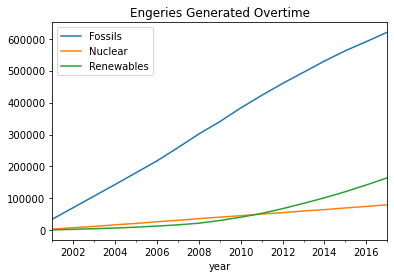

In [85]:
df.fossils.cumsum().plot(label='Fossils')
df.nuclear.cumsum().plot(label='Nuclear')
df.renewables.cumsum().plot(label='Renewables')
plt.title('Engeries Generated Overtime')
plt.legend()